In [1]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [2]:

iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


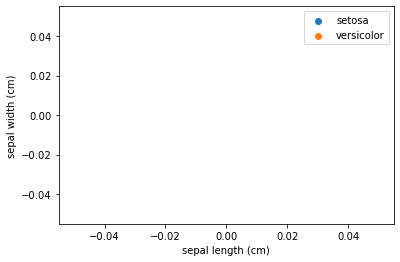

In [3]:

df.target = (df.target == 0).astype(int)

df = df[df['target'] != 'virginica']

plt.scatter(df[df['target']=='setosa']['sepal length (cm)'],
            df[df['target']=='setosa']['sepal width (cm)'],
            label='setosa')
plt.scatter(df[df['target']=='versicolor']['sepal length (cm)'],
            df[df['target']=='versicolor']['sepal width (cm)'],
            label='versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

In [5]:


X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df.target, test_size=0.2, random_state=42)

In [6]:

clf = Perceptron()

# Fit the model on the training data
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [7]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)




Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


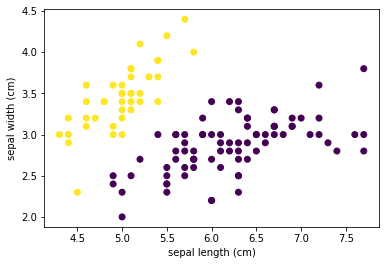

In [8]:
# Visualize the data using a scatter plot
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [9]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class Perceptron:
    def __init__(self, learning_rate=0.1, num_epochs=1000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        
    def fit(self, X, y):
        # add bias term to input data
        X = np.insert(X, 0, 1, axis=1)
        
        # initialize weights to zeros
        self.weights = np.zeros(X.shape[1])
        
        # iterate over training data for specified number of epochs
        for epoch in range(self.num_epochs):
            for i in range(X.shape[0]):
                # calculate predicted class for current input data point
                predicted = np.dot(self.weights, X[i])
                if predicted >= 0:
                    predicted = 1
                else:
                    predicted = -1
                
                # update weights based on prediction error
                error = y[i] - predicted
                self.weights += self.learning_rate * error * X[i]
                
    def predict(self, X):
        # add bias term to input data
        X = np.insert(X, 0, 1, axis=1)
        
        # predict class labels for input data
        y_pred = np.dot(X, self.weights)
        y_pred[y_pred >= 0] = 1
        y_pred[y_pred < 0] = -1
        
        return y_pred


X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


perceptron = Perceptron(learning_rate=0.1, num_epochs=100)
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


Accuracy: 0.45
Precision: 0.45
Recall: 1.00
F1 Score: 0.62
